# Proyek akhir 
# Nama   : Lalu Ardita Arip
# SIB ID : M302X0788
# Email  : ardita.arip18@gmail.com
# Email  :M302X0788@dicoding.org
#alamat  : Lombok Timur, NTB
#kode kelas : M-08

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Dropout
%matplotlib inline
import matplotlib.pyplot as plt


In [64]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [65]:
data.drop(['City','Latitude','Longitude'], axis=1, inplace=True)
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1849-01-01,26.704,1.435,Côte D'Ivoire
1,1849-02-01,27.434,1.362,Côte D'Ivoire
2,1849-03-01,28.101,1.612,Côte D'Ivoire
3,1849-04-01,26.140,1.387,Côte D'Ivoire
4,1849-05-01,25.427,1.200,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [66]:
data['dt'] = pd.to_datetime(data['dt'])  
get_data = (data['dt'] > '1900-01-01') & (data['dt'] <= '2013-09-01')
data.loc[get_data]

data = data.loc[get_data]
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
613,1900-02-01,27.816,0.789,Côte D'Ivoire
614,1900-03-01,28.395,1.296,Côte D'Ivoire
615,1900-04-01,27.706,0.501,Côte D'Ivoire
616,1900-05-01,26.753,0.458,Côte D'Ivoire
617,1900-06-01,25.180,0.733,Côte D'Ivoire
...,...,...,...,...
239172,2013-05-01,18.979,0.807,China
239173,2013-06-01,23.522,0.647,China
239174,2013-07-01,25.251,1.042,China
239175,2013-08-01,24.528,0.840,China


In [67]:
data = data.loc[data['Country'].isin(['India'])]
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
5191,1900-02-01,22.210,0.720,India
5192,1900-03-01,27.790,0.660,India
5193,1900-04-01,30.873,0.646,India
5194,1900-05-01,32.646,0.557,India
5195,1900-06-01,33.192,0.372,India
...,...,...,...,...
216560,2013-05-01,32.980,1.097,India
216561,2013-06-01,29.418,0.527,India
216562,2013-07-01,27.306,0.257,India
216563,2013-08-01,27.187,0.129,India


In [68]:
data.drop(['Country'], axis=1, inplace=True)
data.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,dt,AverageTemperature,AverageTemperatureUncertainty
0,1900-02-01,22.210,0.720
1,1900-03-01,27.790,0.660
2,1900-04-01,30.873,0.646
3,1900-05-01,32.646,0.557
4,1900-06-01,33.192,0.372
...,...,...,...
19091,2013-05-01,32.980,1.097
19092,2013-06-01,29.418,0.527
19093,2013-07-01,27.306,0.257
19094,2013-08-01,27.187,0.129


In [69]:
data.isnull().sum()

dt                                0
AverageTemperature               14
AverageTemperatureUncertainty    14
dtype: int64

In [70]:
data.dropna(subset=['AverageTemperature'],inplace=True)
data.dropna(subset=['AverageTemperatureUncertainty'],inplace=True)
data.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
dtype: int64

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
dtype: object

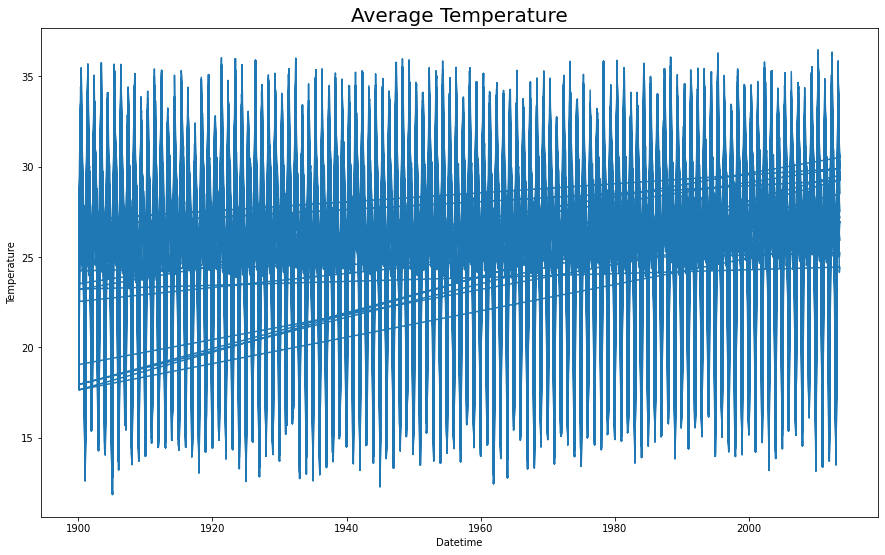

In [71]:
dates = data['dt'].values
temp = data['AverageTemperature'].values

dates = np.array(dates)
temp = np.array(temp)

plt.figure(figsize=(15,9))
plt.plot(dates, temp)

plt.title('Average Temperature', fontsize = 20)
plt.ylabel('Temperature')
plt.xlabel('Datetime')

data.dtypes

In [72]:
x_train, x_valid, y_train, y_valid = train_test_split(temp, dates, train_size=0.8, test_size = 0.2, shuffle = False )

In [73]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder = True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [74]:
tf.keras.backend.set_floatx('float64')
train_set = windowed_dataset(x_train, window_size=64, batch_size=200, shuffle_buffer=1000)
val_set = windowed_dataset(x_valid, window_size=64, batch_size=200, shuffle_buffer=1000)

In [75]:
model = Sequential([
    Bidirectional(LSTM(60, return_sequences=True)),
    Bidirectional(LSTM(60)),
    Dense(30, activation="relu"),
    Dense(10, activation="relu"),
    Dense(1),
])

In [76]:
# Menentukan MAE <10% sekala modul
Mae = (df['AverageTemperature'].max() - df['AverageTemperature'].min()) * 10/100
print(Mae)


2.4628999999999994


In [77]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<2.4 and logs.get('val_mae')<2.4):
      print("\nMAE telah mencapai kurang dari 10% dari sekala")
      self.model.stop_training = True
callbacks = myCallback()

In [78]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(
              loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"]
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [79]:
history = model.fit(
                    train_set,
                    epochs=100,
                    validation_data = val_set,
                    callbacks=[callbacks]
                    )

Epoch 1/100
77/77 [==============================] - 96s 1s/step - loss: 24.8025 - mae: 25.3025 - val_loss: 22.9896 - val_mae: 23.4896
Epoch 2/100
77/77 [==============================] - 84s 1s/step - loss: 21.1701 - mae: 21.6701 - val_loss: 17.0086 - val_mae: 17.5086
Epoch 3/100
77/77 [==============================] - 84s 1s/step - loss: 9.4603 - mae: 9.9511 - val_loss: 3.5280 - val_mae: 4.0001
Epoch 4/100
77/77 [==============================] - 84s 1s/step - loss: 3.3717 - mae: 3.8464 - val_loss: 3.3403 - val_mae: 3.8055
Epoch 5/100
77/77 [==============================] - 84s 1s/step - loss: 3.3493 - mae: 3.8232 - val_loss: 3.3471 - val_mae: 3.8118
Epoch 6/100
77/77 [==============================] - 84s 1s/step - loss: 3.3433 - mae: 3.8175 - val_loss: 3.3130 - val_mae: 3.7782
Epoch 7/100
77/77 [==============================] - 84s 1s/step - loss: 3.3258 - mae: 3.8032 - val_loss: 3.3232 - val_mae: 3.7879
Epoch 8/100
77/77 [==============================] - 84s 1s/step - loss: 3.

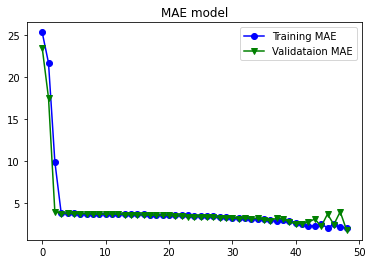

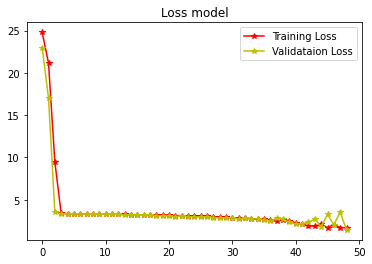

In [80]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training MAE',marker = 'o')
plt.plot(epochs, val_acc, 'g', label = 'Validataion MAE',marker = 'v')
plt.title('MAE model')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss',marker = '*')
plt.plot(epochs, val_loss, 'y', label = 'Validataion Loss',marker = '*')
plt.title('Loss model')
plt.legend(loc = 'best')
plt.show()